In [1]:
%reset
from numpy import *
from scipy import *

from scipy import stats 
# from scipy import interpolate


import netCDF4 as nc
import numpy as np
from scipy.optimize import curve_fit
from numpy import exp, linspace, random
import scipy as sp
import cmocean
import glob
import seawater
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import cmocean as cm

from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
sp.interpolate

AttributeError: module 'scipy' has no attribute 'interpolate'

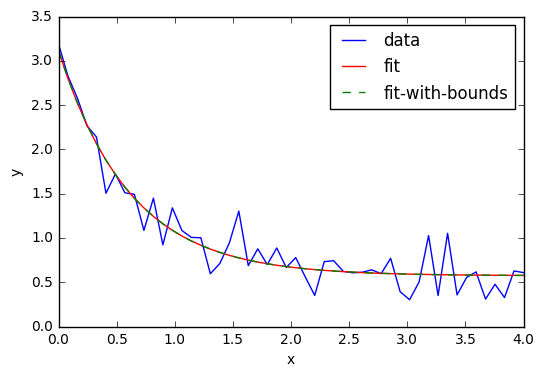

In [4]:


def func(x, a, b, c):
    return a * np.exp(-b * x) + c
#define the data to be fit with some noise
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')
#Fit for the parameters a, b, c of the function func
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')
#Constrain the optimization to the region of 0 < a < 3, 0 < b < 2 and 0 < c < 1:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 2., 1.]))
plt.plot(xdata, func(xdata, *popt), 'g--', label='fit-with-bounds')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [6]:
# #pretty useless

# xdata = t_xs
# ydata = w_salishsea_smoothed

# xdata2 = xs_comp
# ydata2 = ys_comp
# plt.plot(xdata, ydata, 'b-', label='data')
# plt.plot(xdata2, ydata2, 'r-', label='data')
# #Fit for the parameters a, b, c of the function func
# # mask = ~np.isnan(ydata)
# popt, pcov = curve_fit(func,xdata2, ydata2)
# plt.plot(xdata2, func(xdata2, *popt), 'g-', label='fit')
# # #Constrain the optimization to the region of 0 < a < 3, 0 < b < 2 and 0 < c < 1:
# # popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 2., 1.]))
# # plt.plot(xdata, func(xdata, *popt), 'g--', label='fit-with-bounds')
# # plt.xlabel('x')
# # plt.ylabel('y')
# plt.legend()
# plt.show()

In [7]:
# # also useless, gauss
# # Create a function which returns a Gaussian (normal) distribution.
# def gauss(x, *p):
# 	a, b, c, d = p
# 	y = a*np.exp(-np.power((x - b), 2.)/(2. * c**2.)) + d

# 	return y

# # Choose some starting params for our distribution and perturb them
# # using random numbers.
# p_initial = [1.0, 0.0, 0.1, 0.0]
# p_initial = [1.0, 1.0, 0.1, 0.0]
# p_perturbed = [i + 0.5*(random.random()*2 - 1.) for i in p_initial]

# N = 100 # Number of data points.

# # Create our data sets. Perturb the y-data with randomness and
# # generate completely random data for the errors.
# x = xs_comp
# y = ys_comp
# e = np.array([random.random()*0.1 for _ in y])

# # Use curve_fit to fit the gauss function to our data. Use the
# # unperturbed p_initial as our initial guess.
# popt, pcov = curve_fit(gauss, x, y, p0=p_initial, sigma=e)

# # Generate y-data based on the fit.
# y_fit = gauss(x, *popt)

# # Create a plot of our work, showing both the data and the fit.
# fig, ax = plt.subplots()

# #ax.errorbar(x,y,e)
# ax.plot(x,y,color = 'blue')
# ax.plot(x, y_fit, color = 'red')

# ax.set_xlabel(r'$x$')
# ax.set_ylabel(r'$f(x)$')
# ax.set_title('Using scipy.curve_fit to fit a normal distribution.')

# plt.show()